# kNN: k-nearest neighbor classifier 

Exmple of usage kNN library on the well-known Iris dataset.
Evaluation of the leave-one-out cross-validation for different setup of 'k' and 'p' parameters, 
where 'k' is the neigbors count and 'p' the Minkowski distance parameter.

Load libraries

In [1]:
using kNN
using MLDatasets, Random, DataFrames
using Plots, Printf

Load dataset

In [2]:
dataset = DataFrame(shuffle(eachrow(Iris().dataframe)))

,sepallength,sepalwidth,petallength,petalwidth,class
,Float64,Float64,Float64,Float64,String15
1,5.9,3.0,5.1,1.8,Iris-virginica
2,5.6,2.8,4.9,2.0,Iris-virginica
3,5.7,3.0,4.2,1.2,Iris-versicolor
4,5.0,3.5,1.6,0.6,Iris-setosa
5,4.8,3.4,1.6,0.2,Iris-setosa
6,5.2,4.1,1.5,0.1,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,6.7,3.1,4.7,1.5,Iris-versicolor
9,6.4,2.8,5.6,2.2,Iris-virginica


Prepare heatmap matrix of 'k' and 'p' parameters

In [3]:
k_linspace = 1:20
p_linspace = 1:0.05:5
heatmap_matrix = zeros(length(k_linspace), length(p_linspace));

Fill heatmap matrix with accuracy results for different parameters setting

In [4]:
for (k::Int64, k_itr::Int64) in zip(k_linspace, 1:length(k_linspace))
    for (p::Float64, p_itr::Int64) in zip(p_linspace, 1:length(p_linspace))
        heatmap_matrix[k_itr, p_itr] = leave_one_out_kNN(dataset, 1:4, 5, k, p)
    end
end

Plot the heatmap

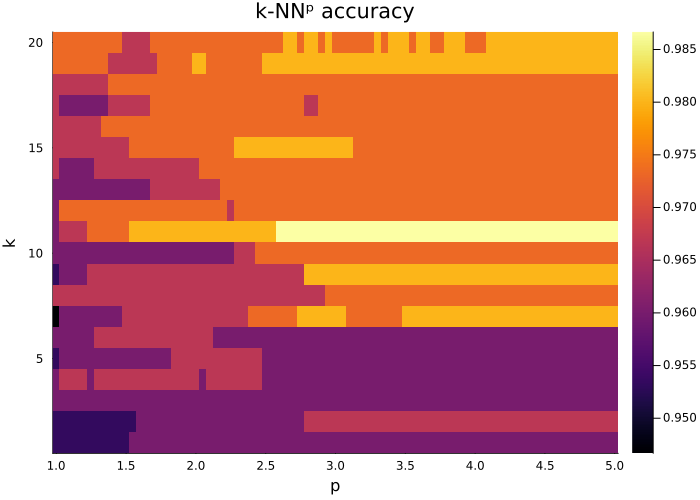

In [18]:
gr(size=(700, 500), html_output_format=:png)
heatmap(heatmap_matrix, xticks = (1:10:length(p_linspace)+1, 
    string.(1:maximum(p_linspace)/10:maximum(p_linspace))), title="k-NNᵖ accuracy", xlabel="p", ylabel="k")

Get the minimum and the maximum accuracy settings

In [10]:
max_arg = argmax(heatmap_matrix)
min_arg = argmin(heatmap_matrix)
@printf "best accuracy: %.3f for p = %.2f and k = %i\n" heatmap_matrix[max_arg] max_arg[2] max_arg[1]
@printf "worst accuracy: %.3f for p = %.2f and k = %i\n" heatmap_matrix[min_arg] min_arg[2] min_arg[1]

best accuracy: 0.987 for p = 33.00 and k = 11
worst accuracy: 0.947 for p = 1.00 and k = 7
